In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display

%config InlineBackend.figure_format = 'retina'

sns.set_theme()

In [54]:
def gather_data(paths: list[str]):
    data = pd.DataFrame()

    for id in paths:
        df = pd.read_csv("logs/" + id + "/data.csv", index_col=False)
        df.rename(columns={df.columns[0]: "epoch"}, inplace=True)
        df["type"] = id
        df["dtype"] = id.split("-")[0]
        df["architecture"] = id.split("-")[1]
        exponential_smoothing(df, "time", "steps", 0.00001)
        exponential_smoothing(df, "epoch", "steps", 0.00001)
        data = pd.concat([data, df])

    return data


def exponential_smoothing(df, x_col, y_col, smoothingParam):
    rangeOfX = (df[x_col].max() - df[x_col].min()) / 7

    smoothingWeight = min(np.sqrt(smoothingParam or 0), 0.999)
    lastY = 0 if len(df[y_col]) > 0 else np.nan
    debiasWeight = 0

    smoothed_values = []

    for index, row in df.iterrows():
        prevX = index - 1 if index > 0 else 0
        changeInX = ((df.at[index, x_col] - df.at[prevX, x_col]) / rangeOfX)
        smoothingWeightAdj = np.power(smoothingWeight, changeInX)

        lastY = lastY * smoothingWeightAdj + row[y_col]
        debiasWeight = debiasWeight * smoothingWeightAdj + 1
        smoothed_values.append(lastY / debiasWeight)

    df["smoothed_" + x_col + "_" + y_col] = smoothed_values
    return df

# Graphs that show speed of convergence is negligible in highly accelerated models

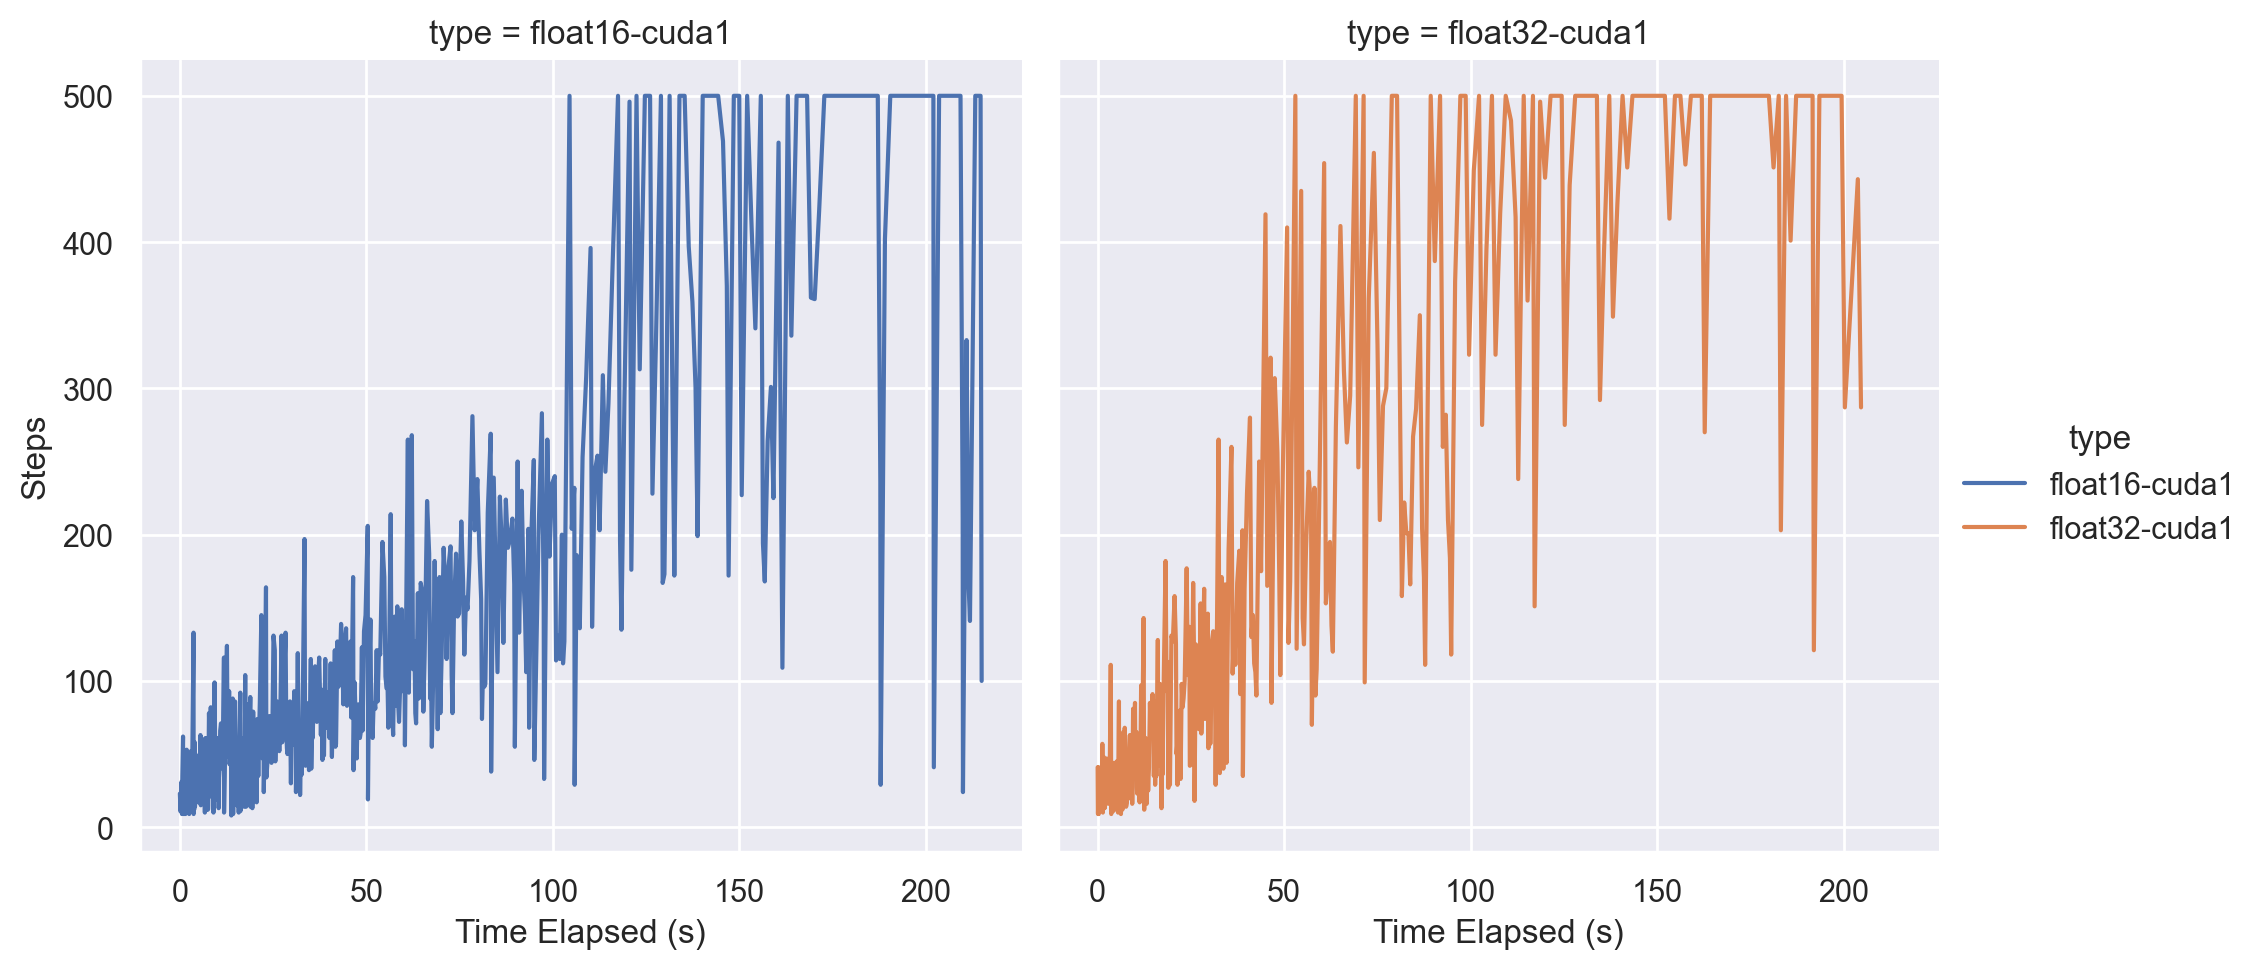

In [14]:
data = gather_data(["float16-cuda1", "float32-cuda1"])
sns.relplot(
    data=data,
    kind="line",
    x="time", y="steps",
    col="type",
    hue="type",
    aspect=5/5
)\
    .set_axis_labels("Time Elapsed (s)", "Steps")

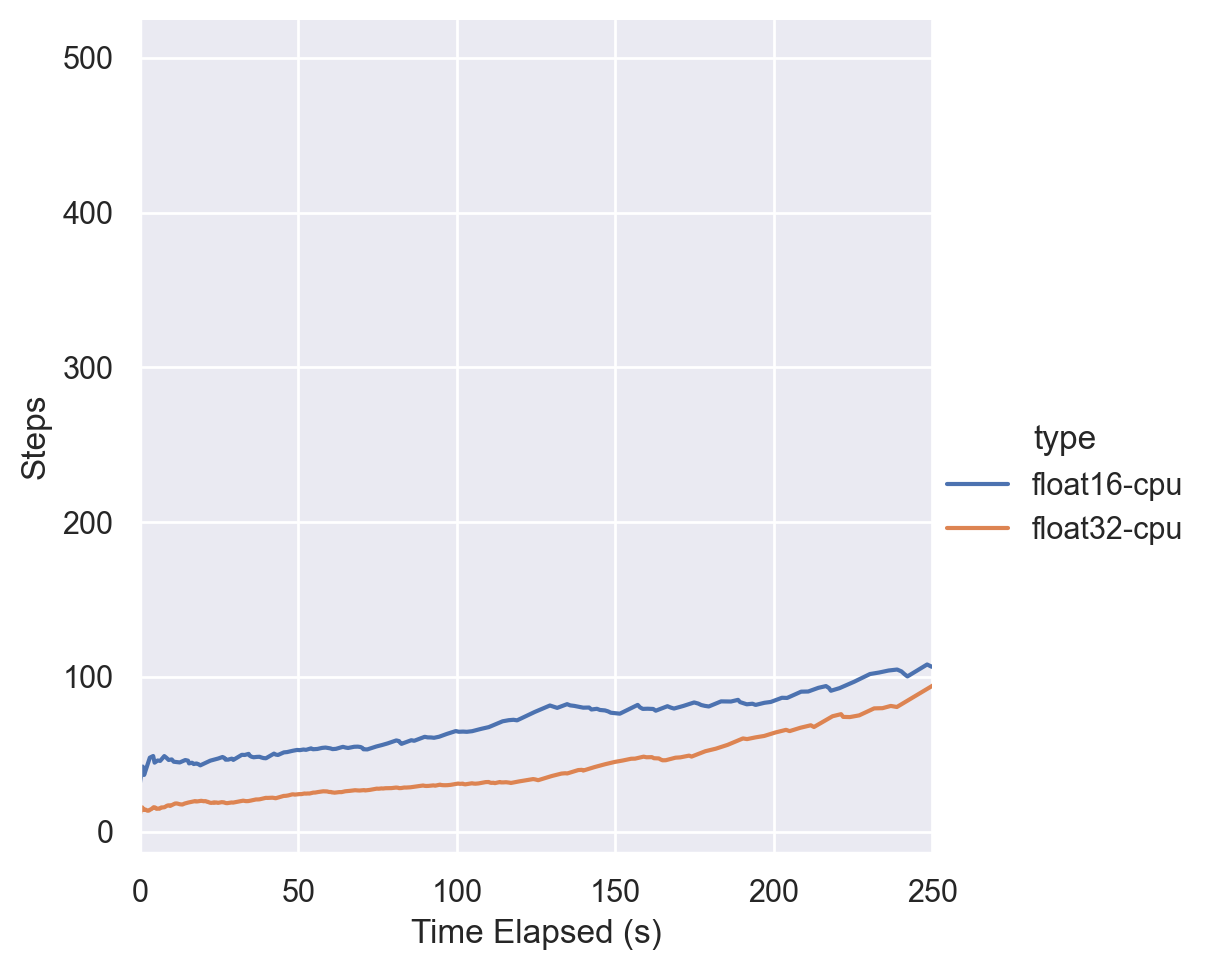

In [53]:
data = gather_data(["float16-cpu", "float32-cpu"])
sns.relplot(
    data=data,
    kind="line",
    x="time", y="smoothed_time_steps",
    hue="type",
    aspect=5/5
)\
    .set_axis_labels("Time Elapsed (s)", "Steps")
plt.xlim(0, 250)
plt.show()

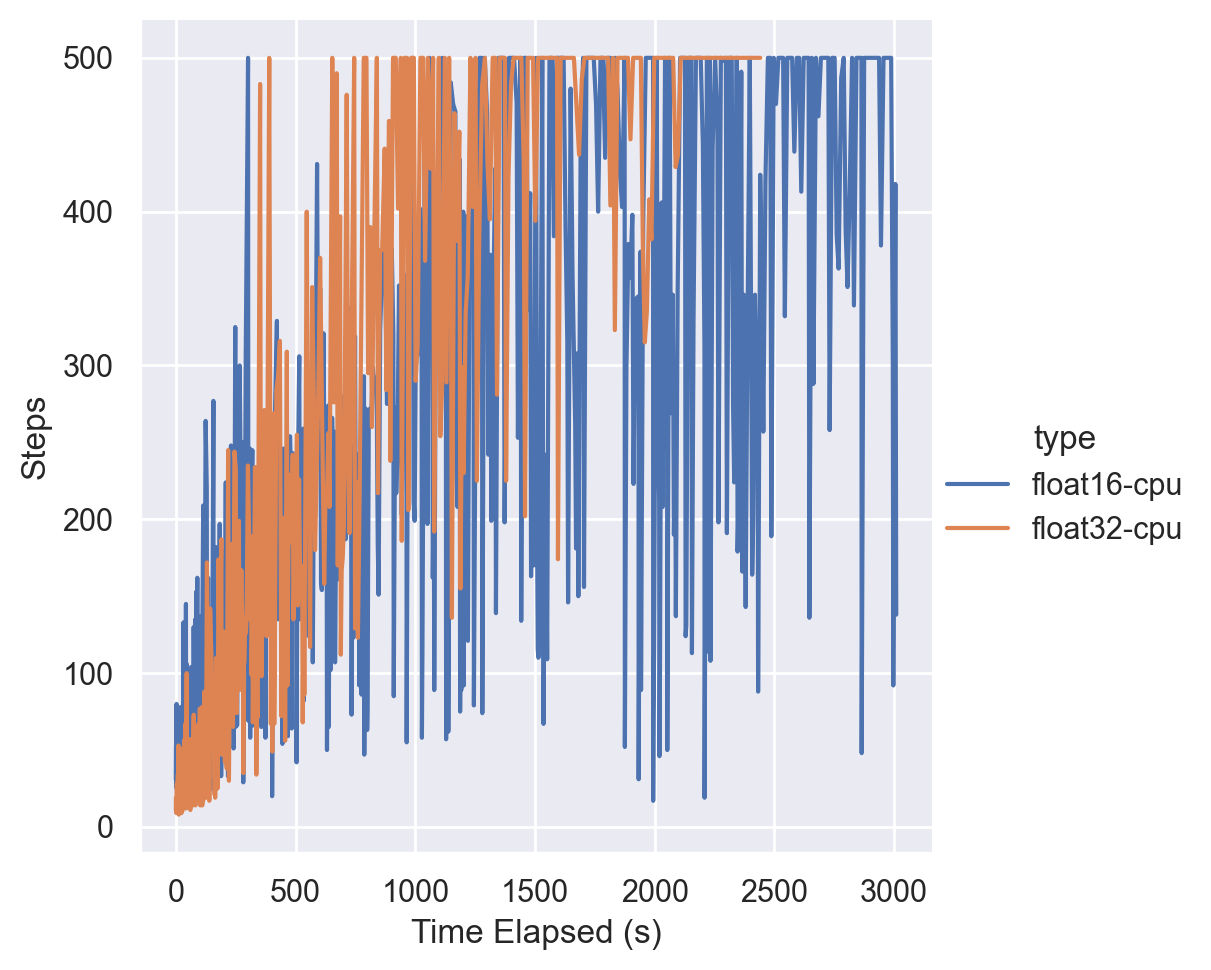

In [56]:
data = gather_data(["float16-cpu", "float32-cpu"])
plot = sns.relplot(
    data=data,
    kind="line",
    x="time", y="smoothed_time_steps",
    hue="type"
)\
    .set_axis_labels("Time Elapsed (s)", "Steps")

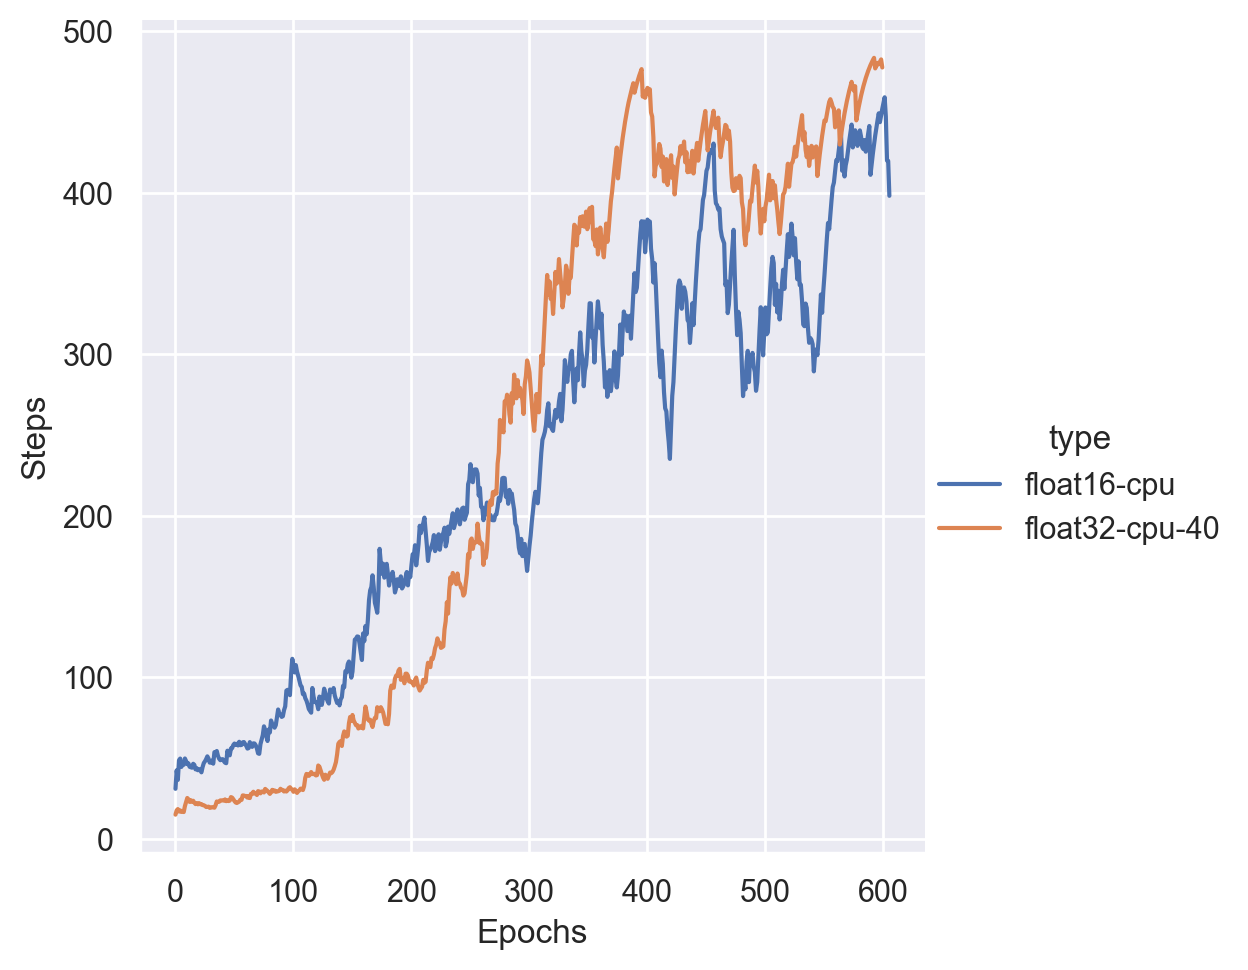

In [51]:
data = gather_data(["float16-cpu", "float32-cpu-40"])

plot = sns.relplot(
    data=data,
    kind="line",
    x="epoch", y="smoothed_epoch_steps",
    hue="type"
)\
    .set_axis_labels("Epochs", "Steps")

plt.show()

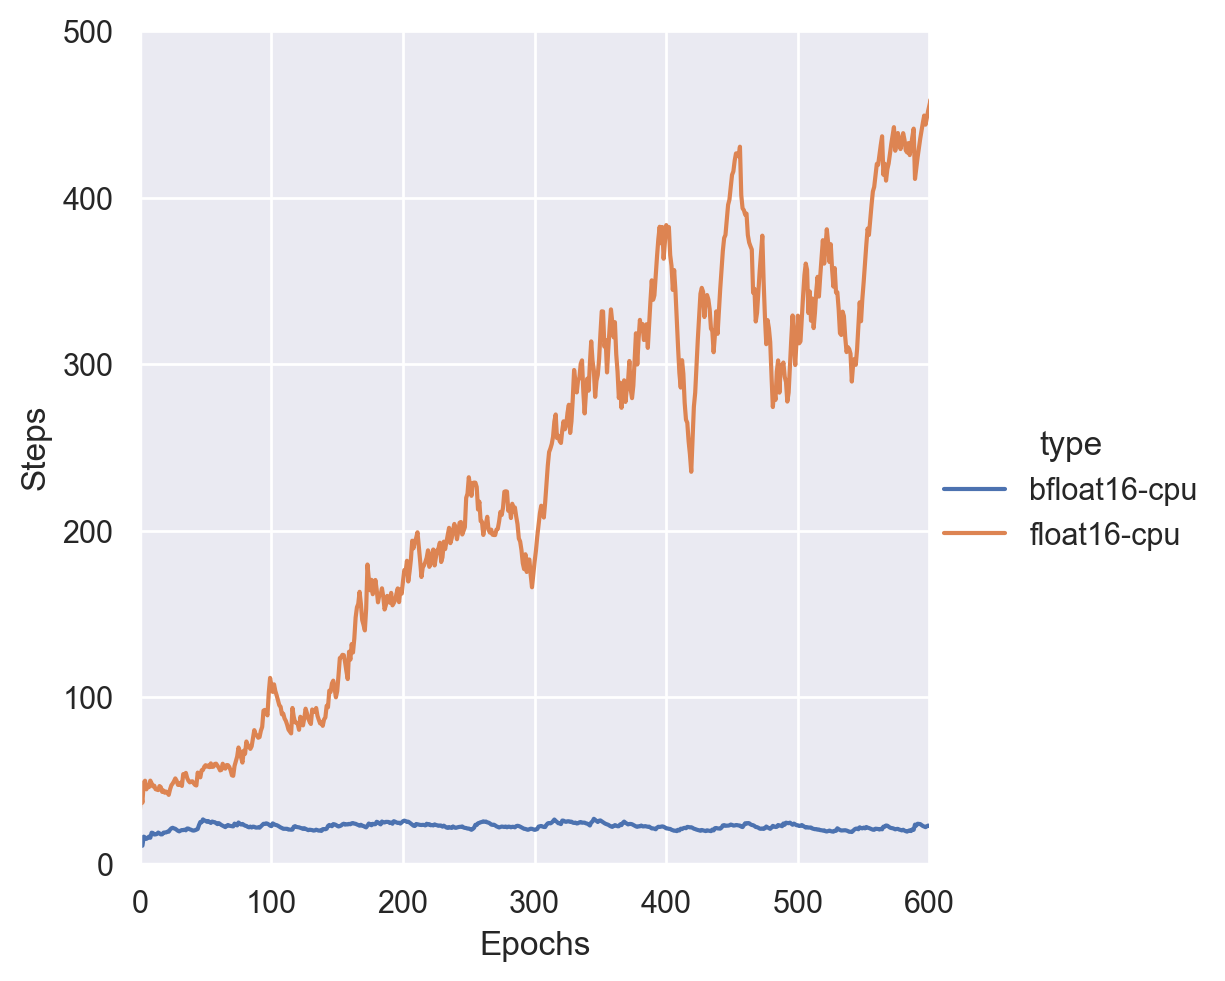

In [50]:
data = gather_data(["bfloat16-cpu", "float16-cpu"])

plot = sns.relplot(
    data=data,
    kind="line",
    x="epoch", y="smoothed_epoch_steps",
    hue="type"
)\
    .set_axis_labels("Epochs", "Steps")

plt.ylim(0, 500)
plt.xlim(0, 600)
plt.show()

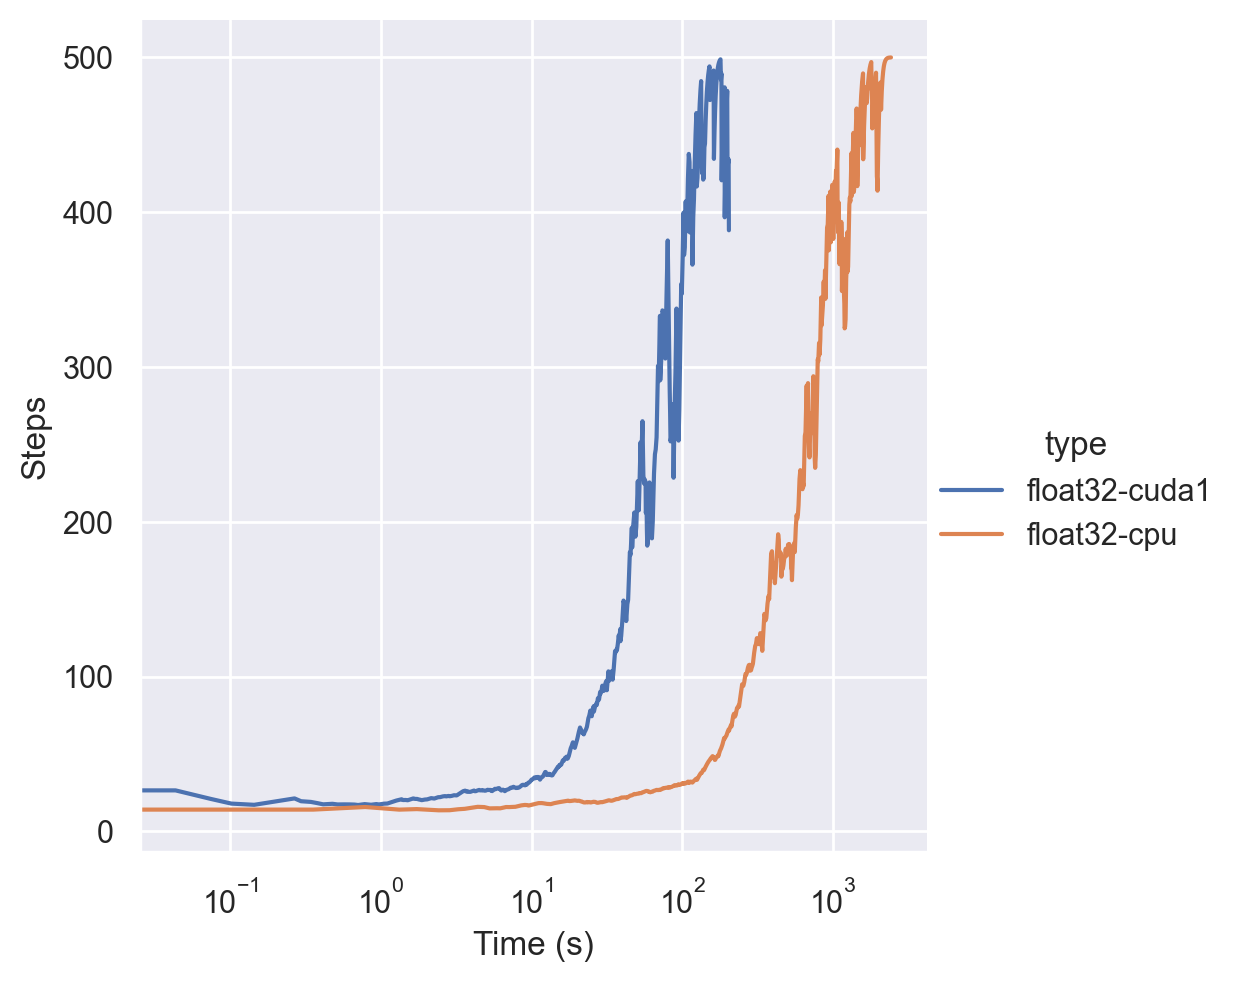

In [49]:
data = gather_data(["float32-cuda1", "float32-cpu"])

plot = sns.relplot(
    data=data,
    kind="line",
    x="time", y="smoothed_time_steps",
    hue="type"
)\
    .set_axis_labels("Time (s)", "Steps")

plt.xscale("log")

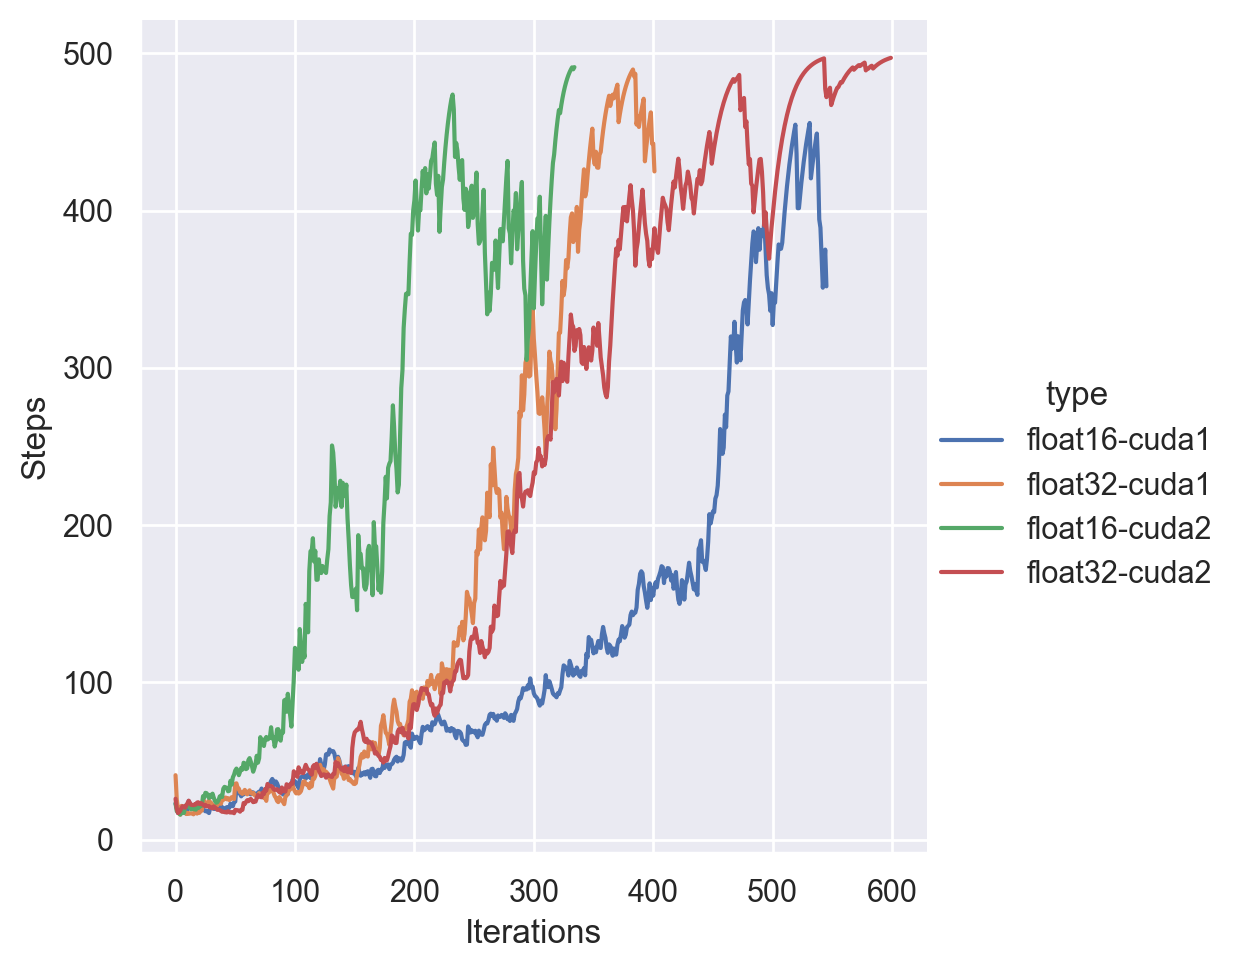

In [48]:
data = gather_data(["float16-cuda1", "float32-cuda1", "float16-cuda2",
                   "float32-cuda2"])
sns.relplot(
    data=data,
    kind="line",
    x="epoch", y="smoothed_epoch_steps",
    hue="type",
    aspect=5/5
)\
    .set_axis_labels("Iterations", "Steps")